In [1]:
from ipynb.fs.full.GraphSubmodular import generateData, getMatrix
import numpy as np
import matplotlib.pyplot as plt

{'qiskit-terra': '0.24.1', 'qiskit-aer': '0.12.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


In [2]:
def randomGraph(n):
    A=np.zeros((n,n))
    while(np.sum(A) == 0 ):
        A=np.zeros((n,n))
        for i in range(0,n):
            for j in range(i+1,n):
                r=np.random.random()
                if(r>=0.5):
                    A[i][j],A[j][i]=1,1
    return A

In [ ]:
Data=[]
f = open("RandomProgress.txt",'w')
print("---------",file=f)
f.flush()
for n in range(4,17):
    d=[]
    for i in range(100):
        A=randomGraph(n)
        g_values = np.linspace(0,10,50)
        values,computed_expectations,exact_expectations, graph_data=generateData(A,g_values)
        computed = np.array(computed_expectations)
        exact = np.array(exact_expectations)
        errors = 100 * abs((computed-exact)/exact)
        d.append(errors)
    d=np.array(d)
    d=d.T
    d=np.mean(d,axis=1)
    Data.append(d)
    print(str(n)+" Qubits Computed",file=f)
    f.flush()

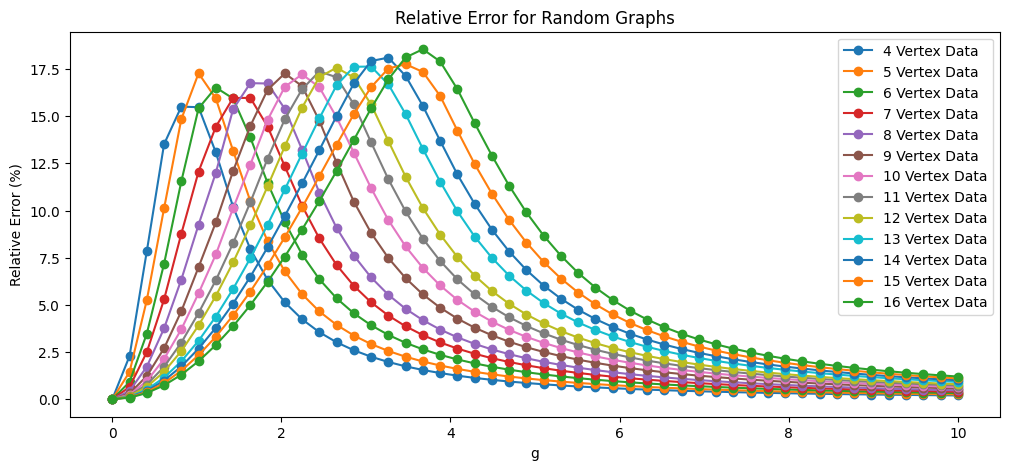

In [27]:
plt.figure(figsize=(12,5))

for j,i in enumerate(Data):
    plt.plot(g_values,np.array(i).T,'-o', label=str(4+j)+" Vertex Data")
plt.legend()
plt.xlabel('g')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error for Random Graphs')
plt.savefig('Random Graphs')
plt.show()